Initial State:
[1, 2, 3]
[4, 0, 6]
[7, 5, 8]

Solving with H1 (Misplaced Tiles):
H1 - Total Nodes Explored: 3
H1 - Solution Depth: 2
Solution Path for H1:
[1, 2, 3]
[4, 5, 6]
[7, 0, 8]

[1, 2, 3]
[4, 5, 6]
[7, 8, 0]

Solving with H2 (Manhattan Distance):
H2 - Total Nodes Explored: 3
H2 - Solution Depth: 2
Solution Path for H2:
[1, 2, 3]
[4, 5, 6]
[7, 0, 8]

[1, 2, 3]
[4, 5, 6]
[7, 8, 0]



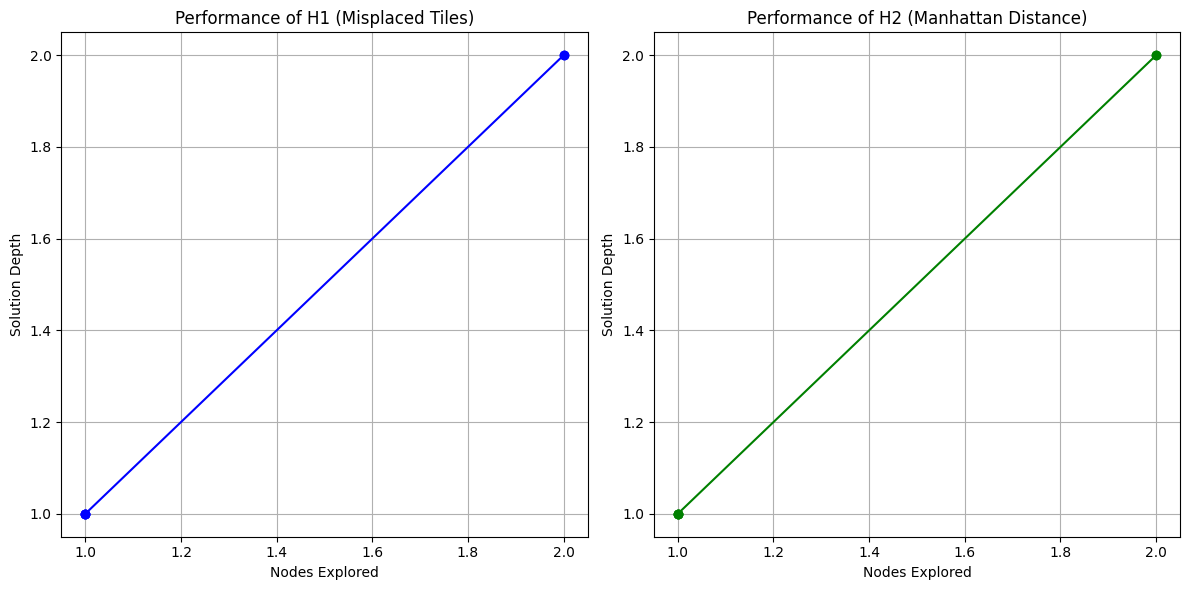

In [1]:
import heapq
import copy
import matplotlib.pyplot as plt

# The goal state of the 8-puzzle
goal_state = [[1, 2, 3],
              [4, 5, 6],
              [7, 8, 0]]  # 0 represents the blank tile

# Function to find the index of the blank tile (0)
def find_blank(state):
    for i in range(3):
        for j in range(3):
            if state[i][j] == 0:
                return i, j

# Heuristic H1: Number of misplaced tiles
def h1_misplaced_tiles(state):
    misplaced = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != 0 and state[i][j] != goal_state[i][j]:
                misplaced += 1
    return misplaced

# Heuristic H2: Sum of Manhattan distances
def h2_manhattan_distance(state):
    distance = 0
    for i in range(3):
        for j in range(3):
            tile = state[i][j]
            if tile != 0:
                goal_i, goal_j = divmod(tile - 1, 3)
                distance += abs(i - goal_i) + abs(j - goal_j)
    return distance

# Function to generate possible moves from a given state
def generate_moves(state):
    moves = []
    blank_i, blank_j = find_blank(state)
    
    # Possible moves (up, down, left, right)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    for di, dj in directions:
        new_i, new_j = blank_i + di, blank_j + dj
        if 0 <= new_i < 3 and 0 <= new_j < 3:
            new_state = copy.deepcopy(state)
            new_state[blank_i][blank_j], new_state[new_i][new_j] = new_state[new_i][new_j], new_state[blank_i][blank_j]
            moves.append(new_state)
    
    return moves

# A* search algorithm implementation
def a_star(initial_state, heuristic, heuristic_name):
    frontier = []
    heapq.heappush(frontier, (0, initial_state, []))  # (priority, state, path)
    explored = set()
    explored.add(tuple(map(tuple, initial_state)))

    nodes_explored = 0
    depths = []
    nodes_explored_list = []
    
    while frontier:
        priority, current_state, path = heapq.heappop(frontier)
        nodes_explored += 1

        # Track intermediate output after every 10 nodes explored
        if nodes_explored % 10 == 0:
            print(f"{heuristic_name}: Nodes Explored: {nodes_explored}, Depth: {len(path)}")
        
        if current_state == goal_state:
            return path, nodes_explored, depths, nodes_explored_list
        
        for next_state in generate_moves(current_state):
            if tuple(map(tuple, next_state)) not in explored:
                explored.add(tuple(map(tuple, next_state)))
                new_path = path + [next_state]
                g = len(new_path)
                h = heuristic(next_state)
                f = g + h
                heapq.heappush(frontier, (f, next_state, new_path))

                # Collecting depth and nodes explored for plotting
                depths.append(len(new_path))
                nodes_explored_list.append(nodes_explored)
    
    return None, nodes_explored, depths, nodes_explored_list

# Helper function to print a puzzle state
def print_puzzle(state):
    for row in state:
        print(row)
    print()

# Function to plot performance
def plot_performance(depths_h1, nodes_explored_h1, depths_h2, nodes_explored_h2):
    plt.figure(figsize=(12, 6))
    
    # Plot for H1
    plt.subplot(1, 2, 1)
    plt.plot(nodes_explored_h1, depths_h1, label='H1: Misplaced Tiles', color='blue', marker='o')
    plt.xlabel('Nodes Explored')
    plt.ylabel('Solution Depth')
    plt.title('Performance of H1 (Misplaced Tiles)')
    plt.grid(True)
    
    # Plot for H2
    plt.subplot(1, 2, 2)
    plt.plot(nodes_explored_h2, depths_h2, label='H2: Manhattan Distance', color='green', marker='o')
    plt.xlabel('Nodes Explored')
    plt.ylabel('Solution Depth')
    plt.title('Performance of H2 (Manhattan Distance)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Main code to test A* with H1 and H2
initial_state = [[1, 2, 3],
                 [4, 0, 6],
                 [7, 5, 8]]  # Example initial state

print("Initial State:")
print_puzzle(initial_state)

# A* with H1 (Misplaced Tiles)
print("Solving with H1 (Misplaced Tiles):")
solution_h1, nodes_explored_h1, depths_h1, nodes_explored_list_h1 = a_star(initial_state, h1_misplaced_tiles, "H1")
print(f"H1 - Total Nodes Explored: {nodes_explored_h1}")
print(f"H1 - Solution Depth: {len(solution_h1)}")

print("Solution Path for H1:")
for step in solution_h1:
    print_puzzle(step)

# A* with H2 (Manhattan Distance)
print("Solving with H2 (Manhattan Distance):")
solution_h2, nodes_explored_h2, depths_h2, nodes_explored_list_h2 = a_star(initial_state, h2_manhattan_distance, "H2")
print(f"H2 - Total Nodes Explored: {nodes_explored_h2}")
print(f"H2 - Solution Depth: {len(solution_h2)}")

print("Solution Path for H2:")
for step in solution_h2:
    print_puzzle(step)

# Plot performance comparison
plot_performance(depths_h1, nodes_explored_list_h1, depths_h2, nodes_explored_list_h2)
